In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv("data/train_with_translations_clean.csv")
df = df[["clean_txt", "clean_txt_T1", "Intencion"]]
train_index, test_index = train_test_split(list(df.index), random_state=13571113)
train_df = df.iloc[train_index].reset_index().drop(columns="index")
test_df = df.iloc[test_index].reset_index().drop(columns="index")
thr = train_df["Intencion"].value_counts().values[0] // 2
cats_to_popu = [ k for k, v in dict(train_df["Intencion"].value_counts()).items() if v < thr]
train_da_df = train_df[train_df["Intencion"].isin(cats_to_popu)][["clean_txt_T1", "Intencion"]]
train_da_df.columns = ["clean_txt", "Intencion"]
train_df = train_df[["clean_txt", "Intencion"]]

train_df = pd.concat([train_df, train_da_df])
train_df.columns = ["Pregunta", "Intencion"]

test_df = test_df[["clean_txt", "Intencion"]]
test_df.columns = ["Pregunta", "Intencion"]

In [ ]:
test_df.to_csv("exp1/valid.csv", index=False)
train_df.to_csv("exp1/train.csv", index=False)

In [ ]:
encode_cat = json.load(open(mapping_dict, "r"))
train_dataset['ENCODE_CAT'] = train_dataset['Intencion'].apply(lambda x: encode_cat(x))
test_dataset['ENCODE_CAT'] = test_dataset['Intencion'].apply(lambda x: encode_cat(x))

## Translate es --> ar --> es

In [74]:
import pandas as pd
from tqdm.auto import tqdm
from googletrans import Translator

In [75]:
translator = Translator()

In [86]:
df = pd.read_csv("data/train_with_translations_clean.csv")
df_test = pd.read_csv("data/test_with_translations_clean.csv")

In [87]:
sentences_es = list(df.Pregunta.values)
print(f'Amount of sentences {len(sentences_es)}')
sentences_es[:2]

Amount of sentences 20104


['como puedo trabajar en santander rio', 'pagar tarjeta visa querer reintegro']

In [88]:
sentences_es_test = list(df_test.Pregunta.values)
print(f'Amount of sentences {len(sentences_es_test)}')
sentences_es_test[:2]

Amount of sentences 6702


['querer saber tarjeta sin limite',
 '¿cuál es el límite de mi tarjeta santander?']

In [89]:
translations_ar = []
for sent in tqdm(sentences_es):
    translation = translator.translate(sent, src="es", dest="ar").text
    translations_ar.append(translation)
print(f'Amount sentences en: {len(translations_ar)}')

translations_es_back = []
for sent in tqdm(translations_ar):
    translation = translator.translate(sent, src="ar", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')

df["Pregunta_T4_ar"] = translations_es_back


translations_ar = []
for sent in tqdm(sentences_es_test):
    translation = translator.translate(sent, src="es", dest="ar").text
    translations_ar.append(translation)
print(f'Amount sentences en: {len(translations_ar)}')

translations_es_back = []
for sent in tqdm(translations_ar):
    translation = translator.translate(sent, src="ar", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')

df_test["Pregunta_T4_ar"] = translations_es_back

Amount sentences en: 20104


Amount sentences en: 20104


Amount sentences en: 6702


Amount sentences en: 6702


In [92]:
!pip install joblib

In [93]:
from textacy.preprocess import preprocess_text as textacy_preprocess
import re
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def remove_stopwords(text):
    """Remove stop words from list of tokenized words."""
    new_words = [word for word in text.split() if word not in STOPWORDS_SET]
    return ' '.join(new_words)


def remove_emoticons(text):
    """Remove emoticos."""
    return EMOJI_PATTERN.sub('', text)


def to_lowercase(text):
    """To lowercase."""
    return text.lower()


def preprocess_text(text, fix_unicode=True, lowercase=True,
                    no_urls=True, no_emails=True,
                    no_phone_numbers=True,
                    no_numbers=True, no_currency_symbols=True,
                    no_punct=True, no_accents=True):
    """Preprocess text."""
    clean_text = ""
    if text:
        clean_text = remove_emoticons(text)
        if lowercase:
            clean_text = to_lowercase(clean_text)
#        clean_text = remove_stopwords(clean_text)
        clean_text = textacy_preprocess(clean_text, fix_unicode=fix_unicode,
                                        lowercase=lowercase,
                                        no_urls=no_urls, no_emails=no_emails,
                                        no_phone_numbers=no_phone_numbers,
                                        no_numbers=no_numbers,
                                        no_currency_symbols=no_currency_symbols,
                                        no_punct=no_punct,
                                        no_accents=no_accents)
    return clean_text

In [95]:
df["clean_txt_T4_ar"] = df["Pregunta_T4_ar"].apply(lambda x: preprocess_text(x))
df_test["clean_txt_T4_ar"] = df_test["Pregunta_T4_ar"].apply(lambda x: preprocess_text(x))

In [96]:
df.head()

,Pregunta,Intencion,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr,Pregunta_T4_ar,clean_txt_T4_ar
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar tarjeta visa quiere reembolso,pagar tarjeta visa querer reintegro,pagar tarjeta visa quiere reembolso,pagar la tarjeta visa quiere un reembolso,pagar la tarjeta visa quiere un reembolso,Pague la tarjeta Visa que desea un reembolso,pague la tarjeta visa que desea un reembolso
2,pagar tarjeta naranja sistema,Cat_132,tarjeta naranja del sistema de pago,pagar tarjeta naranja sistema,tarjeta naranja del sistema de pago,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja,Sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera cuota del plan de propiedad persona...,no se debito la primera cuota del plan de bien...,la primera cuota del plan de propiedad persona...,la primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...,La primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,abonar tarjeta credito,tarjeta de credito,tarjeta de crédito,tarjeta de credito,Tarjeta de crédito,tarjeta de credito


In [98]:
df_ = pd.read_csv("data/train_with_translations_clean.csv")
df_test_ = pd.read_csv("data/test_with_translations_clean.csv")

In [101]:
df_["clean_txt_T4_ar"] = df["clean_txt_T4_ar"]
df_test_["clean_txt_T4_ar"] = df_test["clean_txt_T4_ar"]
df_["Pregunta_T4_ar"] = df["Pregunta_T4_ar"]
df_test_["Pregunta_T4_ar"] = df_test["Pregunta_T4_ar"]

In [104]:
df_.to_csv("data/train_with_translations_clean.csv", index=False)
df_test_.to_csv("data/test_with_translations_clean.csv", index=False)

In [109]:
import seaborn as sns

In [111]:
columns = ["clean_txt_T1", "clean_txt_T2_fr", "clean_txt_T3_pt", "clean_txt_T4_ar"]
df = df_[columns + ["clean_txt", "Intencion"]]
df0 = df[["clean_txt", "Intencion"]].copy()
for col in columns:
    thr = df0["Intencion"].value_counts().values[0] // 2
    print(thr)
    cats_to_popu = [ k for k, v in dict(df0["Intencion"].value_counts()).items() if v < thr]
    print(f'Amount categories to populate : {len(cats_to_popu)}')
    df1 = df[df["Intencion"].isin(cats_to_popu)][[col, "Intencion"]].copy()
    df1.columns = ["clean_txt", "Intencion"]
    df0 = pd.concat([df0, df1])

300
Amount categories to populate : 333
300
Amount categories to populate : 330
300
Amount categories to populate : 320
300
Amount categories to populate : 292


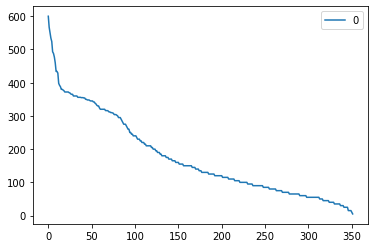

In [112]:
sns.lineplot(data=pd.DataFrame(list(df0.Intencion.value_counts().values)))